# Movie Analysis

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [9]:
df = pd.read_csv(r"C:\Users\User\Downloads\netflix_t.csv", encoding='latin-1')

In [10]:
df.head()

,id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,25-Sep-21,2020,PG-13,90 min,Documentaries
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,24-Sep-21,2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."


In [11]:
df.shape

(8809, 11)

In [12]:
df.columns

Index(['id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8809 entries, 0 to 8808
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            8809 non-null   object
 1   type          8809 non-null   object
 2   title         8809 non-null   object
 3   director      6175 non-null   object
 4   cast          7984 non-null   object
 5   country       7978 non-null   object
 6   date_added    8799 non-null   object
 7   release_year  8809 non-null   int64 
 8   rating        8805 non-null   object
 9   duration      8806 non-null   object
 10  listed_in     8809 non-null   object
dtypes: int64(1), object(10)
memory usage: 757.2+ KB


## Data Cleaning

In [14]:
# check missing data
df.isna().sum()

id                 0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
dtype: int64

In [16]:
 df.duplicated().sum() # looking for duplicates

0

In [17]:
## replace missing data with unknown
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)
df['country'].fillna('Unknown', inplace=True)

In [18]:
df.isna().sum()

id               0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           4
duration         3
listed_in        0
dtype: int64

In [19]:
## replace missing data for others using mode since it is not a number
df['date_added'].fillna(method='bfill', inplace=True)
df['rating'].fillna(df['rating'].mode()[0], inplace=True)
df['duration'].fillna('Unknown', inplace=True)

In [20]:
df.isna().sum()

id              0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [21]:
df.head()

,id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,25-Sep-21,2020,PG-13,90 min,Documentaries
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,24-Sep-21,2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."


## Exploratory Data Analysis

## Content Analysis

In [23]:
# distribution of movies vs. TV shows in the dataset?
df.head(2)

,id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,25-Sep-21,2020,PG-13,90 min,Documentaries
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"


In [26]:
df['type'].value_counts()

Movie      6132
TV Show    2677
Name: type, dtype: int64

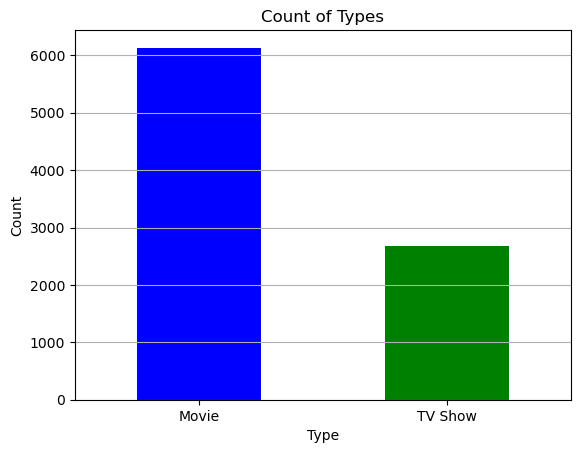

In [29]:
df['type'].value_counts().plot.bar(color=['blue', 'green'])
plt.title('Count of Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.grid(axis='y')

# Show the plot
plt.show()

## The graph indicates that there are approximately three times as many movies as there are TV shows. This suggest that movies are more popular or that there is a larger selection of movies available.

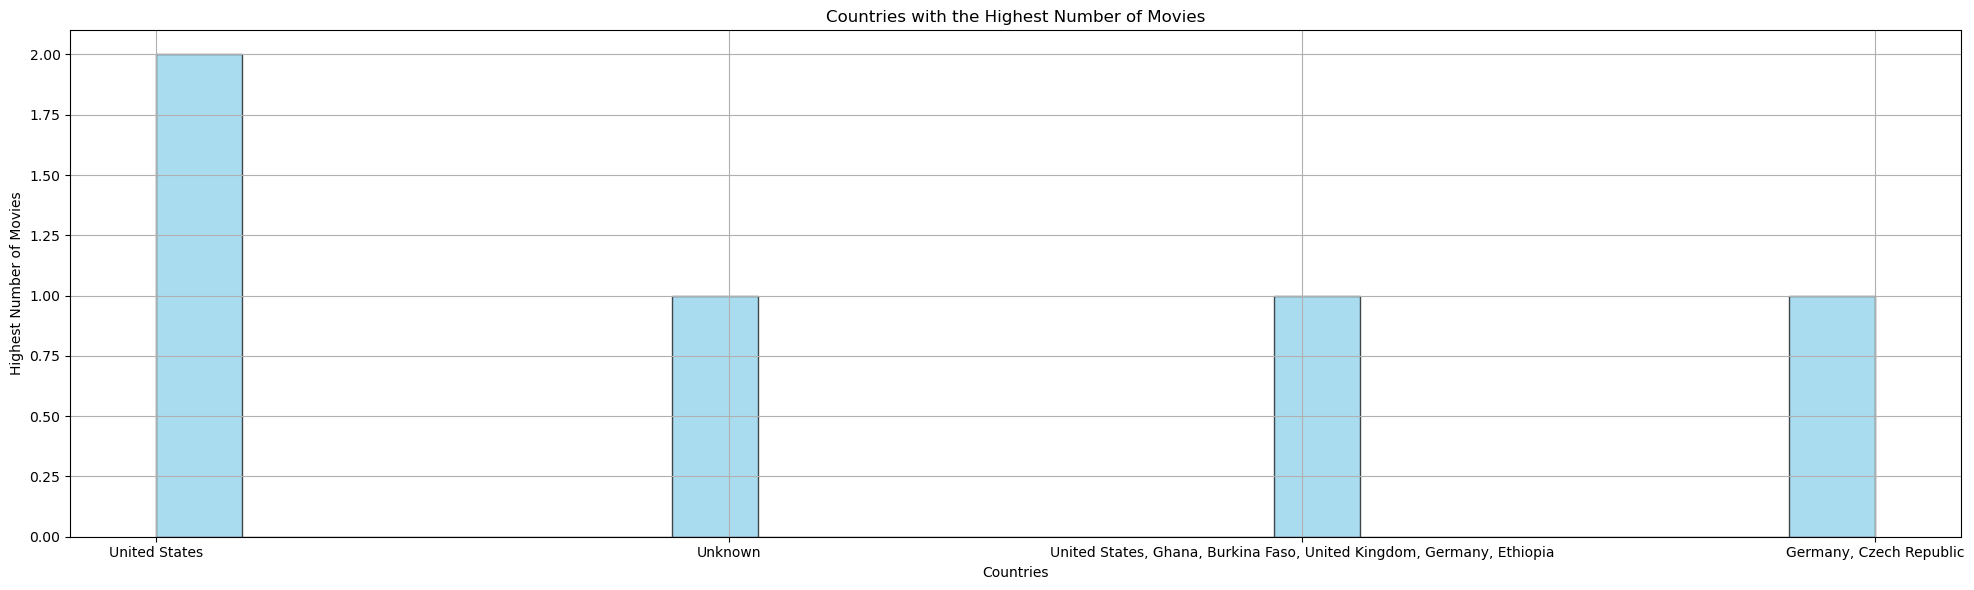

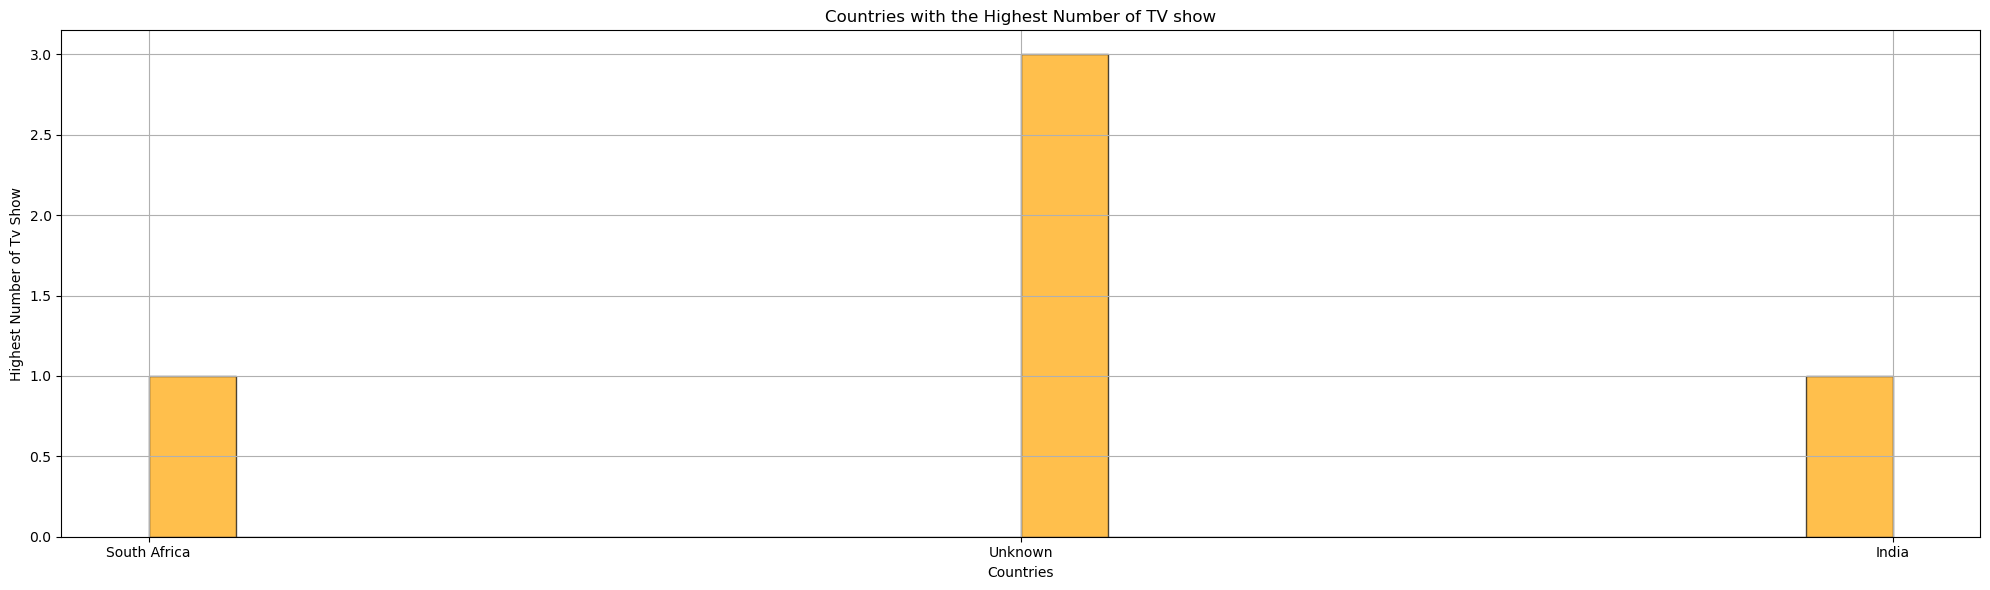

In [139]:
# Which countries have the highest number of movies and TV shows?
movies = df[df['type'] == 'Movie']
tv_shows = df[df['type'] == 'TV Show']

# Plotting the distribution of release years for movies
plt.figure(figsize=(20, 6))
movies['country'].head().hist(bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Countries')
plt.ylabel('Highest Number of Movies')
plt.title('Countries with the Highest Number of Movies')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting the distribution of release years for TV shows
plt.figure(figsize=(20, 6))
tv_shows['country'].head().hist(bins=20, color='orange', edgecolor='black', alpha=0.7)
plt.xlabel('Countries')
plt.ylabel('Highest Number of Tv Show')
plt.title('Countries with the Highest Number of TV show')
plt.grid(True)
plt.tight_layout()
plt.show()

## Unknown Countries: This category has the highest count, with approximately 3 shows. It could represent regions where data is not clearly defined or categorized.

## South Africa: With about 1 show, it suggests a lower production or availability of TV shows compared to the Unknown Countries.

## India: Having less than 1 show on the graph indicates a surprisingly low number, which may not reflect the actual prolific TV industry in India.

In [71]:
top_countries

United States     2819
India              972
Unknown            831
United Kingdom     419
Japan              245
Name: country, dtype: int64

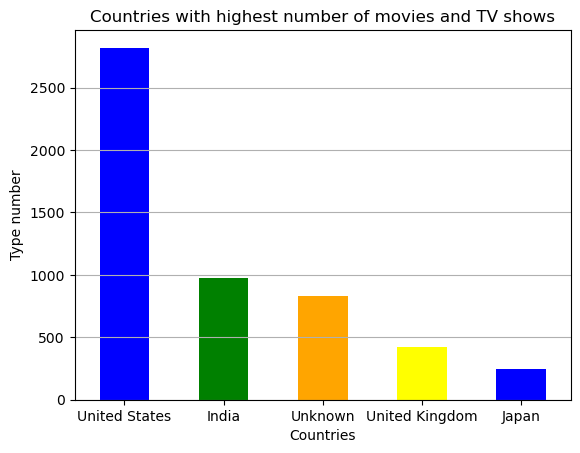

In [59]:
top_countries.plot.bar(color=['blue','green','orange','yellow'])
plt.title('Countries with highest number of movies and TV shows')
plt.xlabel('Countries')
plt.ylabel('Type number')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.grid(axis='y')

# Show the plot
plt.show()

## The U.S. has the highest count with a blue bar follwed by India’s count is just above 1000, represented by a green bar and followed by unknown countries, the United Kingdom, and Japan also have significant numbers, though less than the U.S. and India

In [53]:
# What is the most common genre/category listed in the dataset?
df.head(2)

,id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,25-Sep-21,2020,PG-13,90 min,Documentaries
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"


In [67]:
listed = df['listed_in'].value_counts().head(10)

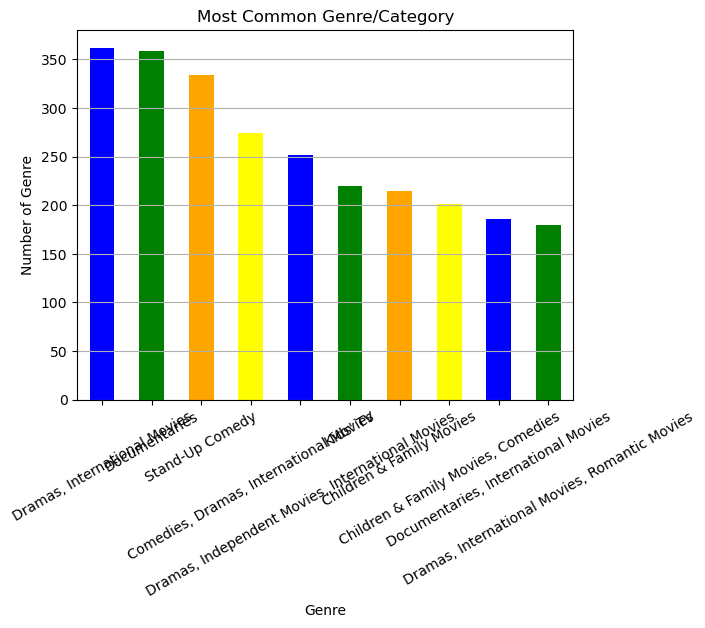

In [68]:
listed.plot.bar(color=['blue','green','orange','yellow'])
plt.title('Most Common Genre/Category')
plt.xlabel('Genre')
plt.ylabel('Number of Genre')
plt.xticks(rotation=30)  # Rotate x-axis labels if needed
plt.grid(axis='y')

# Show the plot
plt.show()

## Dramas, International Movies: This combination has the highest count, with 350 movies.

## Variety of Genres: The graph includes a range of genres such as Stand-Up Comedy, Comedies, Dramas, Children & Family Movies, and Documentaries.

## Genre Popularity: The graph suggests that Dramas and International Movies are the most common genres, possibly due to their broad appeal and production rates.

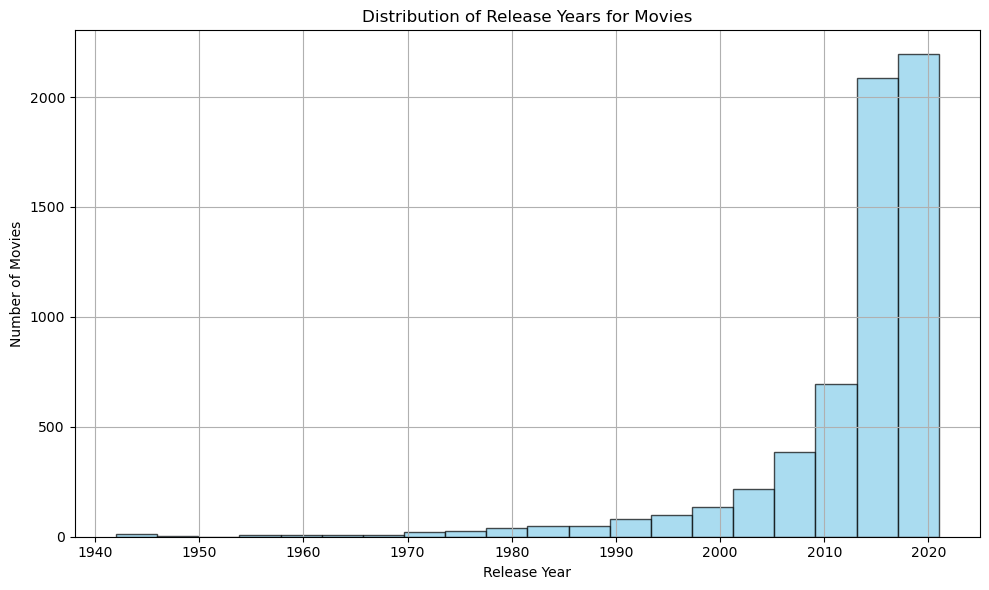

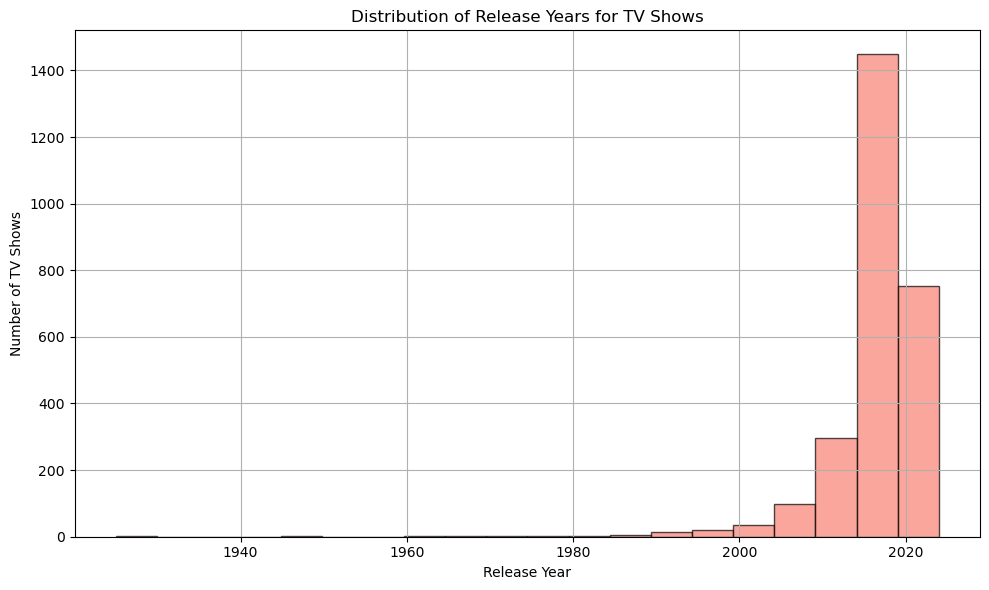

In [69]:
# distribution of release years look like for movies and TV shows
movies = df[df['type'] == 'Movie']
tv_shows = df[df['type'] == 'TV Show']

# Plotting the distribution of release years for movies
plt.figure(figsize=(10, 6))
movies['release_year'].hist(bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.title('Distribution of Release Years for Movies')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting the distribution of release years for TV shows
plt.figure(figsize=(10, 6))
tv_shows['release_year'].hist(bins=20, color='salmon', edgecolor='black', alpha=0.7)
plt.xlabel('Release Year')
plt.ylabel('Number of TV Shows')
plt.title('Distribution of Release Years for TV Shows')
plt.grid(True)
plt.tight_layout()
plt.show()

## Post-2000 Increase: A significant increase in releases is seen after 2000, with a spike after 2010.

## Peak Releases: The highest number of releases is observed around 2019, with over 1400 TV shows.

## Trends and Patterns

In [78]:
# Trend in the number of titles added over time (date_added)
df.head(2)

,id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,25-Sep-21,2020,PG-13,90 min,Documentaries
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"


In [79]:
df['date_added'] = pd.to_datetime(df['date_added'])

In [80]:
titles_added_per_day = df.groupby('date_added').size()

In [87]:
titles_added_per_day.max()

111

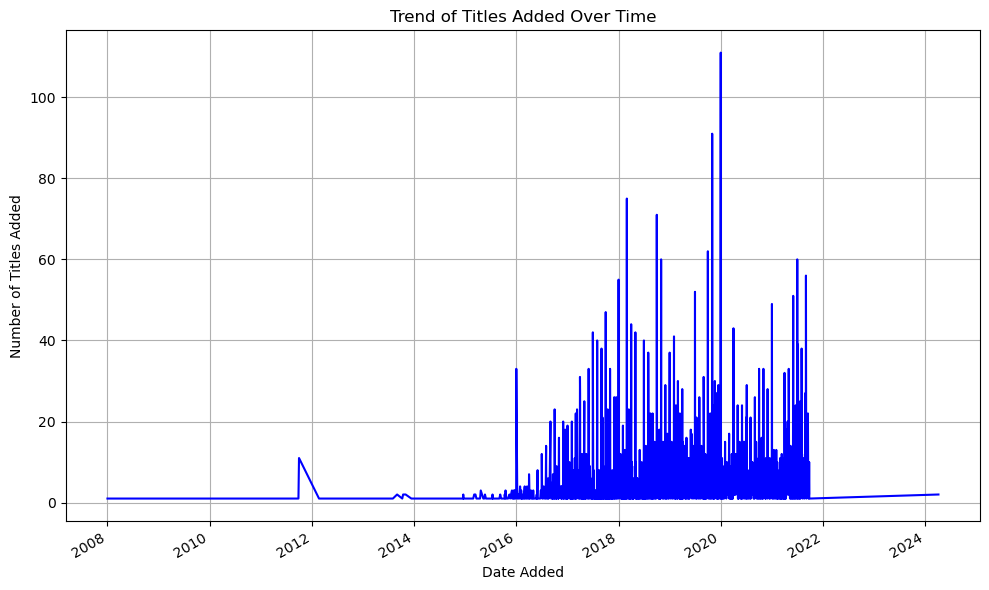

In [81]:
plt.figure(figsize=(10, 6))
titles_added_per_day.plot(kind='line', color='blue')
plt.xlabel('Date Added')
plt.ylabel('Number of Titles Added')
plt.title('Trend of Titles Added Over Time')
plt.grid(True)
plt.tight_layout()
plt.show()

## Increasing Trend: There’s a significant increase in the number of titles added around the year 2020.

## Time Frame: The graph spans from 2008 to 2024, providing a comprehensive view of the trend over 16 years.

## Data Points: The blue line indicates the actual data points, which can be used to analyze specific periods of interest.

In [98]:
# Do certain countries or regions tend to produce specific genres more frequently?
country_genre_counts = df.groupby(['country', 'listed_in']).size().unstack(fill_value=0)

# Analyze genre preferences for each country
top_genres_by_country = country_genre_counts.idxmax(axis=1)

# Display the top genres preferred by each country
print("Top Genres Preferred by Each Country:")
print(top_genres_by_country)

Top Genres Preferred by Each Country:
country
, France, Algeria                                       Dramas, Independent Movies, International Movies
, South Korea                                                          International TV Shows, TV Dramas
Argentina                                                                                Stand-Up Comedy
Argentina, Brazil, France, Poland, Germany, Denmark              Dramas, International Movies, Thrillers
Argentina, Chile                                        Dramas, Independent Movies, International Movies
                                                                             ...                        
Venezuela                                                            Documentaries, International Movies
Venezuela, Colombia                                                  Documentaries, International Movies
Vietnam                                                Action & Adventure, Comedies, International Mo...
West Germ

## Rating Analysis

In [99]:
# distribution of content ratings (e.g., PG-13, TV-MA) in the dataset?
df.head(2)

,id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"


In [101]:
df['rating'].value_counts()

TV-MA       3212
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
A              1
Name: rating, dtype: int64

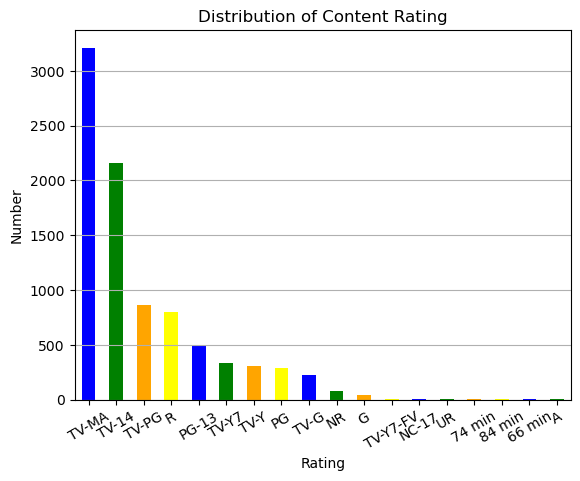

In [108]:
rate = df['rating'].value_counts()
rate.plot.bar(color=['blue','green','orange','yellow'])
plt.title('Distribution of Content Rating')
plt.xlabel('Rating')
plt.ylabel('Number')
plt.xticks(rotation=30)  # Rotate x-axis labels if needed
plt.grid(axis='y')

# Show the plot
plt.show()

## The highest count of content items is rated TV-MA, indicating a large volume of mature audience content.

## TV-14 and PG-13: These ratings follow, suggesting a significant amount of content suitable for teens and older audiences.

## Variety of Ratings: The graph includes a range of ratings from G to NC-17, reflecting the diversity of content available.

## Popular Titles and directors

In [116]:
# What are the most popular titles in terms of viewer ratings or reviews?
df.head(2)

,id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"


In [118]:
df['title'].value_counts().head()

22-Jul                          2
9-Feb                           2
15-Aug                          2
Dick Johnson Is Dead            1
Marco Polo: One Hundred Eyes    1
Name: title, dtype: int64

In [125]:
# Who are the most prolific directors in the dataset, and what genres do they specialize in?
df['director'].value_counts().head()

Unknown                    2634
Rajiv Chilaka                19
Ra?§l Campos, Jan Suter      18
Suhas Kadav                  16
Marcus Raboy                 16
Name: director, dtype: int64

In [127]:
# Genre specialized
df.groupby(['director', 'listed_in']).size().head()

director                    listed_in                                          
??agan Irmak                Dramas, International Movies                           1
??lex Pastor, David Pastor  Horror Movies, Sci-Fi & Fantasy, Thrillers             1
                            Independent Movies, International Movies, Thrillers    1
??mer Faruk Sorak           Action & Adventure, Comedies, International Movies     1
                            Dramas, International Movies, Romantic Movies          1
dtype: int64

## Duration Analysis


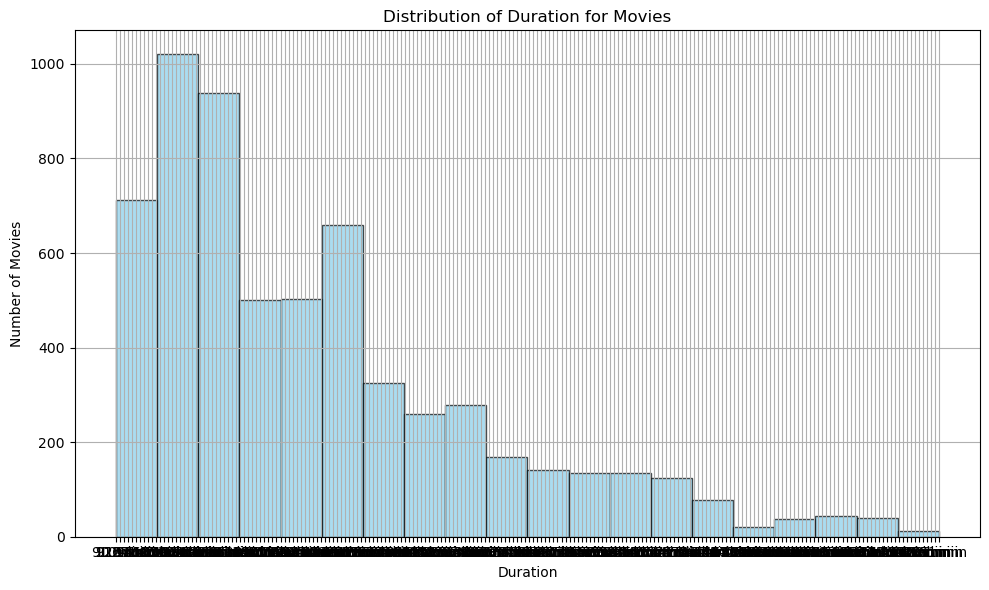

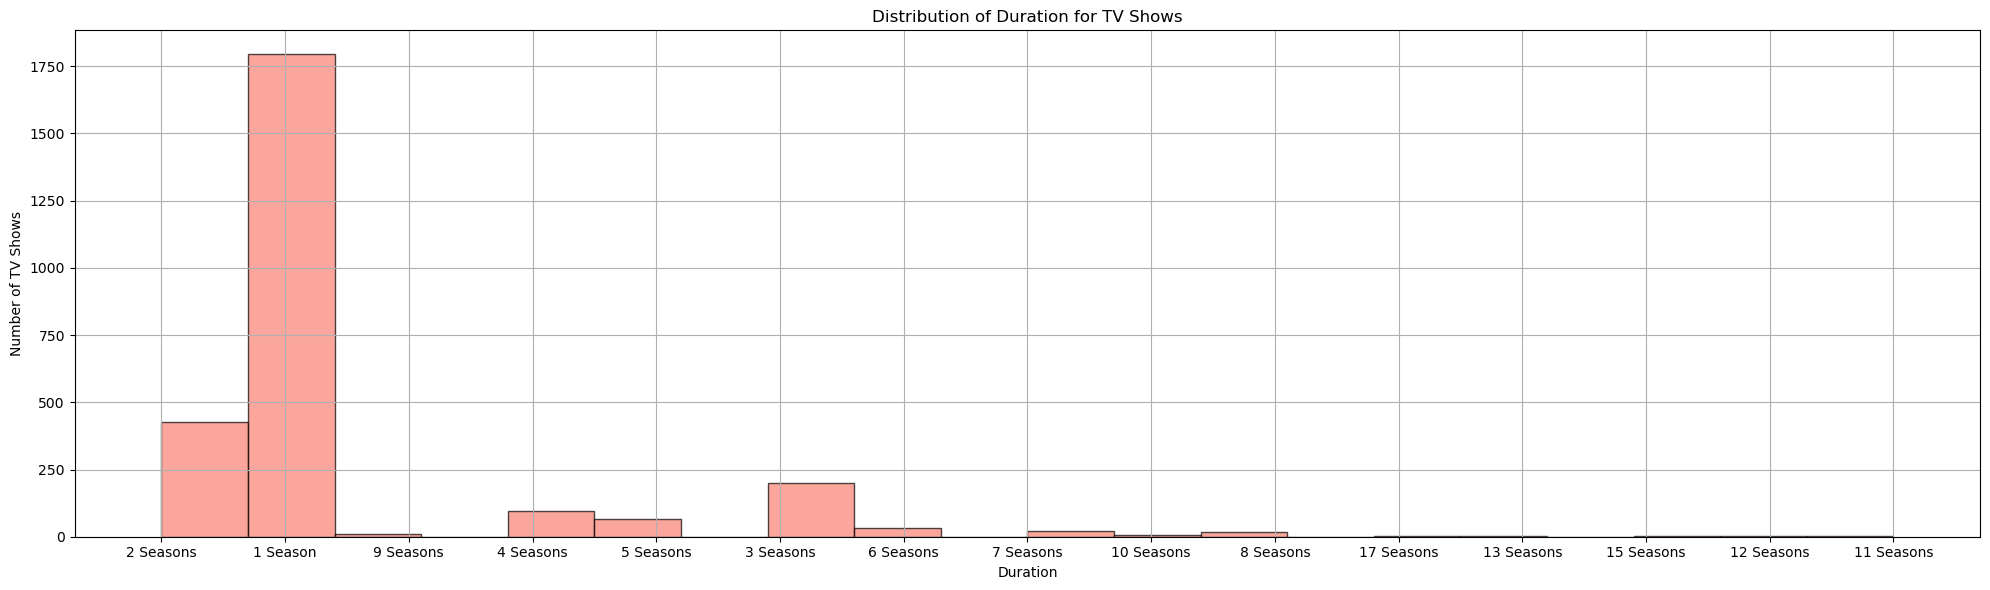

In [140]:
# What is the average duration (runtime) of movies vs. TV shows?
movies = df[df['type'] == 'Movie']
tv_shows = df[df['type'] == 'TV Show']

# Plotting the distribution of release years for movies
plt.figure(figsize=(10, 6))
movies['duration'].hist(bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Duration')
plt.ylabel('Number of Movies')
plt.title('Distribution of Duration for Movies')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting the distribution of release years for TV shows
plt.figure(figsize=(20, 6))
tv_shows['duration'].hist(bins=20, color='salmon', edgecolor='black', alpha=0.7)
plt.xlabel('Duration')
plt.ylabel('Number of TV Shows')
plt.title('Distribution of Duration for TV Shows')
plt.grid(True)
plt.tight_layout()
plt.show()

# Distribution of Duration for TV Shows graph indicates that most TV shows last for 1 season, with a significant drop in numbers as the duration increases. Here are the key points:

## 1 Season: Over 1750 TV shows lasted for a season, suggesting it’s a common duration for TV series.

## Longer Durations Less Common: Fewer TV shows last for 5, 6, or 8 seasons, indicating that longer-running series are less common.

## Data Limitations: The absence of bars for other season lengths may suggest no data or very few TV shows with those durations.

In [131]:
# How does the duration vary across different genres or content types?
duration_genre_counts = df.groupby(['duration', 'listed_in']).size().unstack(fill_value=0)

# Analyze genre preferences for each country
top_genres_by_duration = duration_genre_counts.idxmax(axis=1).head(2)

# Display the top genres preferred by each country
print("Top Genres Preferred by Each Duration:")
print(top_genres_by_duration)

Top Genres Preferred by Each Duration:
duration
1 Season                                              Kids' TV
10 Seasons    British TV Shows, Classic & Cult TV, TV Comedies
dtype: object


## Geographical Insights

In [128]:
# Are there any differences in content preferences or genres between countries
df.head(2)

,id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"


In [137]:
country_genre_counts = df.groupby(['country', 'listed_in']).size().reset_index(name='count')

# Pivot the table to have 'Country' as rows, 'listed_in' (genres) as columns, and count as values
pivot_table = country_genre_counts.pivot(index='country', columns='listed_in', values='count').fillna(0)

# Display the pivot table showing genre counts for each country
print(pivot_table)

listed_in                                           Action & Adventure  \
country                                                                  
, France, Algeria                                                  0.0   
, South Korea                                                      0.0   
Argentina                                                          0.0   
Argentina, Brazil, France, Poland, Germany, Den...                 0.0   
Argentina, Chile                                                   0.0   
...                                                                ...   
Venezuela                                                          0.0   
Venezuela, Colombia                                                0.0   
Vietnam                                                            0.0   
West Germany                                                       0.0   
Zimbabwe                                                           0.0   

listed_in                            

In [136]:
country_genre_counts

,country,listed_in,count
0,", France, Algeria","Dramas, Independent Movies, International Movies",1
1,", South Korea","International TV Shows, TV Dramas",1
2,Argentina,"Action & Adventure, Comedies, International Mo...",1
3,Argentina,"Action & Adventure, Horror Movies, Internation...",1
4,Argentina,"Children & Family Movies, Music & Musicals",1
...,...,...,...
2792,Vietnam,"Dramas, International Movies",1
2793,Vietnam,"Dramas, International Movies, Romantic Movies",1
2794,Vietnam,"Horror Movies, International Movies, Thrillers",1
2795,West Germany,"Documentaries, International Movies",1


In [145]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))